In [10]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import matplotlib.pyplot as plt


In [11]:
basics = pd.read_csv('title.basics.tsv.gz', sep='\t')

C:\Users\Utente\AppData\Local\Temp\ipykernel_8852\782650695.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv('title.basics.tsv.gz', sep='\t')


In [14]:
basics.sample(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1605880,tt11146596,short,Tuulastulia Laatokalla,Tuulastulia Laatokalla,0,1939,\N,3,"Documentary,Short"
1562766,tt11068430,video,Detective MJ Nohilly,Detective MJ Nohilly,0,2014,\N,4,"Crime,Short"
357659,tt0373254,movie,Queen of the Gypsies,Queen of the Gypsies,0,2004,\N,80,\N
5607871,tt21876316,tvEpisode,Episode #1.366,Episode #1.366,0,\N,\N,\N,Drama
5575134,tt2179133,movie,Loot,Loot,0,2012,\N,138,"Crime,Drama,Thriller"
6328963,tt26624734,tvEpisode,Episode dated 10 November 2022,Episode dated 10 November 2022,0,2022,\N,\N,\N
4153535,tt15836086,tvEpisode,Episode #1.1133,Episode #1.1133,0,\N,\N,60,"Comedy,Game-Show,Talk-Show"
1426876,tt10826806,tvEpisode,Episode #26.4,Episode #26.4,0,1993,\N,\N,Documentary
6627714,tt27682203,tvEpisode,Episode #1.2,Episode #1.2,0,2022,\N,\N,\N
3527414,tt14679348,tvEpisode,Episode #1.729,Episode #1.729,0,\N,\N,\N,Drama


In [15]:
type(basics)

pandas.core.frame.DataFrame

In [16]:
basics['startYear']

0           1894
1           1892
2           1892
3           1892
4           1893
            ... 
10009205    2009
10009206    2010
10009207    2010
10009208    2015
10009209    2014
Name: startYear, Length: 10009210, dtype: object

In [17]:
len(basics)

10009210

In [18]:
basics['titleType']

0               short
1               short
2               short
3               short
4               short
              ...    
10009205    tvEpisode
10009206    tvEpisode
10009207    tvEpisode
10009208        short
10009209    tvEpisode
Name: titleType, Length: 10009210, dtype: object

In [19]:
movie_filter = basics['titleType'] == 'movie'


In [20]:
movie_dataset = basics[movie_filter]

In [21]:
ratings = pd.read_csv('title.ratings.tsv.gz' ,sep='\t')

In [22]:
ratings.sample(10)

,tconst,averageRating,numVotes
144215,tt0228338,7.30,20
76923,tt0104249,6.90,72
615880,tt13222466,9.00,251
1263876,tt8135000,4.40,40
908287,tt23806336,5.20,29
951111,tt2749034,7.70,17
115008,tt0168047,7.40,466
490835,tt1075037,6.10,18
995698,tt3347460,5.20,20
971724,tt2989652,8.40,7


In [23]:
ratings.describe()

,averageRating,numVotes
count,1330213.00,1330213.00
mean,6.96,1038.74
std,1.38,17486.39
min,1.00,5.00
25%,6.20,11.00
50%,7.10,26.00
75%,7.90,101.00
max,10.00,2765528.00


<Axes: >

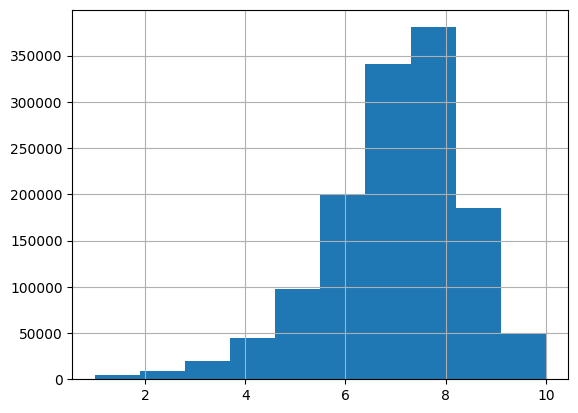

In [24]:
ratings['averageRating'].hist()


(0.0, 50000.0)

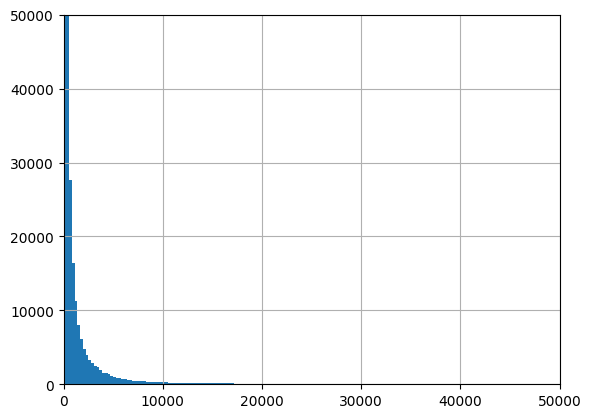

In [25]:
p = ratings['numVotes'].hist(bins=10000)
p.set_xlim(0,50000)
p.set_ylim(0,50000)

In [26]:
ratings['logNumVotes'] = np.log(ratings['numVotes'])


In [31]:
ratings


,tconst,averageRating,numVotes,logNumVotes
0,tt0000001,5.70,1987,7.59
1,tt0000002,5.80,265,5.58
2,tt0000003,6.50,1848,7.52
3,tt0000004,5.50,178,5.18
4,tt0000005,6.20,2630,7.87
...,...,...,...,...
1330208,tt9916730,8.30,10,2.30
1330209,tt9916766,7.00,21,3.04
1330210,tt9916778,7.20,36,3.58
1330211,tt9916840,7.50,7,1.95


<Axes: >

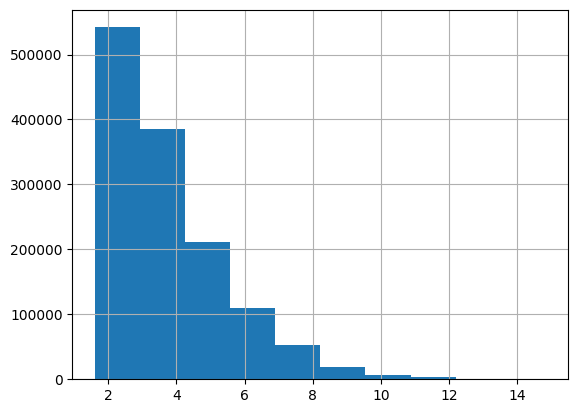

In [30]:
ratings['logNumVotes'].hist()

In [32]:
ratings.max()


tconst           tt9916880
averageRating        10.00
numVotes           2765528
logNumVotes          14.83
dtype: object

In [33]:
ratings['averageRating']  /= ratings['averageRating'].max() 
ratings['logNumVotes']  /= ratings['logNumVotes'].max() 

In [34]:
ratings


,tconst,averageRating,numVotes,logNumVotes
0,tt0000001,0.57,1987,0.51
1,tt0000002,0.58,265,0.38
2,tt0000003,0.65,1848,0.51
3,tt0000004,0.55,178,0.35
4,tt0000005,0.62,2630,0.53
...,...,...,...,...
1330208,tt9916730,0.83,10,0.16
1330209,tt9916766,0.70,21,0.21
1330210,tt9916778,0.72,36,0.24
1330211,tt9916840,0.75,7,0.13


In [35]:
ratings.describe()


,averageRating,numVotes,logNumVotes
count,1330213.00,1330213.00,1330213.00
mean,0.70,1038.74,0.25
std,0.14,17486.39,0.12
min,0.10,5.00,0.11
25%,0.62,11.00,0.16
50%,0.71,26.00,0.22
75%,0.79,101.00,0.31
max,1.00,2765528.00,1.00


In [36]:
ratings['FilmRating'] = ratings['averageRating'] * ratings['logNumVotes']

In [37]:
ratings


,tconst,averageRating,numVotes,logNumVotes,FilmRating
0,tt0000001,0.57,1987,0.51,0.29
1,tt0000002,0.58,265,0.38,0.22
2,tt0000003,0.65,1848,0.51,0.33
3,tt0000004,0.55,178,0.35,0.19
4,tt0000005,0.62,2630,0.53,0.33
...,...,...,...,...,...
1330208,tt9916730,0.83,10,0.16,0.13
1330209,tt9916766,0.70,21,0.21,0.14
1330210,tt9916778,0.72,36,0.24,0.17
1330211,tt9916840,0.75,7,0.13,0.10


In [38]:
ratings['FilmRating'] *= 10
ratings


,tconst,averageRating,numVotes,logNumVotes,FilmRating
0,tt0000001,0.57,1987,0.51,2.92
1,tt0000002,0.58,265,0.38,2.18
2,tt0000003,0.65,1848,0.51,3.30
3,tt0000004,0.55,178,0.35,1.92
4,tt0000005,0.62,2630,0.53,3.29
...,...,...,...,...,...
1330208,tt9916730,0.83,10,0.16,1.29
1330209,tt9916766,0.70,21,0.21,1.44
1330210,tt9916778,0.72,36,0.24,1.74
1330211,tt9916840,0.75,7,0.13,0.98


<Axes: >

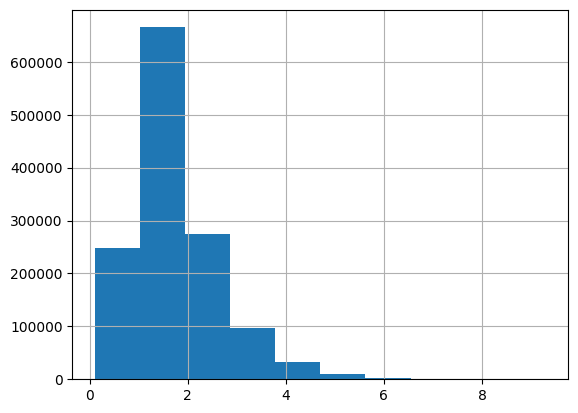

In [39]:
ratings['FilmRating'].hist()

In [40]:
rated_movies = movie_dataset.merge(ratings, on = 'tconst')

In [41]:
rated_movies


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logNumVotes,FilmRating
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,0.53,206,0.36,1.90
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",0.53,476,0.42,2.20
2,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,0.41,15,0.18,0.75
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",0.60,836,0.45,2.72
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,0.44,20,0.20,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294303,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,0.58,1429,0.49,2.84
294304,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",0.64,5418,0.58,3.71
294305,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",0.38,14,0.18,0.68
294306,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama,0.86,7,0.13,1.13


In [42]:
rated_movies['genres']

0                            Romance
1             Documentary,News,Sport
2                                 \N
3         Action,Adventure,Biography
4                              Drama
                     ...            
294303                      Thriller
294304                 Drama,History
294305         Adventure,History,War
294306                         Drama
294307                         Drama
Name: genres, Length: 294308, dtype: object

In [43]:
scifi_filter = rated_movies['genres'].str.contains('Sci-Fi')

scifi_ratedMovies = rated_movies[scifi_filter]

In [44]:
scifi_filter.value_counts()

genres
False    287360
True       6948
Name: count, dtype: int64

In [45]:
columnsOfInterest = ['primaryTitle','isAdult',	'startYear','runtimeMinutes', 'genres',	'FilmRating']

In [46]:
scifi_final = scifi_ratedMovies[columnsOfInterest]

In [47]:
scifi_final = scifi_final.sort_values(by = 'FilmRating', ascending = False)

In [48]:
scifi_final

,primaryTitle,isAdult,startYear,runtimeMinutes,genres,FilmRating
175302,Inception,0,2010,148,"Action,Adventure,Sci-Fi",8.72
69819,The Matrix,0,1999,136,"Action,Sci-Fi",8.50
141460,Interstellar,0,2014,169,"Adventure,Drama,Sci-Fi",8.49
137409,The Prestige,0,2006,130,"Drama,Mystery,Sci-Fi",8.10
56972,Terminator 2: Judgment Day,0,1991,137,"Action,Sci-Fi",8.08
...,...,...,...,...,...,...
207381,Deadly Parasite,0,2022,\N,Sci-Fi,0.29
266963,Mastera poroka,0,2010,112,"Drama,Sci-Fi",0.27
206720,Timeserver,0,2004,113,"Drama,Romance,Sci-Fi",0.26
192985,Synapsy,0,2021,81,Sci-Fi,0.24


In [65]:
scifi_final.to_csv('scifi_final.csv')

In [108]:
#filter per film azione
action_filter = rated_movies['genres'].str.contains('Action')
action_filter

0         False
1         False
2         False
3          True
4         False
          ...  
294303    False
294304    False
294305    False
294306    False
294307    False
Name: genres, Length: 294308, dtype: bool

In [109]:
Action_ratedMovies =rated_movies[action_filter]
Action_ratedMovies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logNumVotes,FilmRating
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",0.60,836,0.45,2.72
83,tt0002574,movie,What Happened to Mary,What Happened to Mary,0,1912,\N,150,"Action,Drama,Thriller",0.64,31,0.23,1.48
137,tt0003545,movie,Who Will Marry Mary?,Who Will Marry Mary?,0,1913,\N,\N,"Action,Adventure",0.52,29,0.23,1.18
183,tt0003897,movie,The Exploits of Elaine,The Exploits of Elaine,0,1914,\N,220,Action,0.63,93,0.31,1.93
194,tt0004052,movie,The Hazards of Helen,The Hazards of Helen,0,1914,\N,1428,Action,0.69,113,0.32,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294241,tt9903802,movie,Dosage Volume I,Dosage Volume I,0,2002,\N,\N,"Action,Documentary,Sport",0.74,10,0.16,1.15
294243,tt9903920,movie,Dosage Volume II,Dosage Volume II,0,2003,\N,\N,"Action,Documentary,Sport",0.69,8,0.14,0.97
294245,tt9903968,movie,Dosage Volume III,Dosage Volume III,0,2005,\N,\N,"Action,Documentary,Sport",0.72,6,0.12,0.87
294274,tt9910206,movie,Facebook idióták - A Mozifilm,Facebook idióták - A Mozifilm,0,2017,\N,45,"Action,Adventure,Comedy",0.81,13,0.17,1.40


In [110]:
Action_ratedMovies[columnsOfInterest]
action_final = Action_ratedMovies[columnsOfInterest]

action_final

,primaryTitle,isAdult,startYear,runtimeMinutes,genres,FilmRating
3,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",2.72
83,What Happened to Mary,0,1912,150,"Action,Drama,Thriller",1.48
137,Who Will Marry Mary?,0,1913,\N,"Action,Adventure",1.18
183,The Exploits of Elaine,0,1914,220,Action,1.93
194,The Hazards of Helen,0,1914,1428,Action,2.20
...,...,...,...,...,...,...
294241,Dosage Volume I,0,2002,\N,"Action,Documentary,Sport",1.15
294243,Dosage Volume II,0,2003,\N,"Action,Documentary,Sport",0.97
294245,Dosage Volume III,0,2005,\N,"Action,Documentary,Sport",0.87
294274,Facebook idióták - A Mozifilm,0,2017,45,"Action,Adventure,Comedy",1.40


In [113]:
action_film=action_final.sort_values(by = 'FilmRating', ascending = False)


In [117]:
action_film.to_csv('action_final.csv')

In [119]:
#same for comedy film
comedy_filter = rated_movies['genres'].str.contains('Comedy')
comedy = rated_movies[comedy_filter]

In [120]:
comedy

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logNumVotes,FilmRating
13,tt0001028,movie,Salome Mad,Salome Mad,0,1909,\N,\N,Comedy,0.41,18,0.19,0.80
78,tt0002474,movie,Saty delaji cloveka,Saty delaji cloveka,0,1913,\N,\N,Comedy,0.64,11,0.16,1.03
104,tt0002996,movie,My Husband's Getting Married,Házasodik az uram,0,1913,\N,\N,Comedy,0.36,31,0.23,0.83
108,tt0003015,movie,Die Insel der Seligen,Die Insel der Seligen,0,1913,\N,49,"Comedy,Fantasy",0.47,67,0.28,1.33
138,tt0003565,movie,Where Is Coletti?,Wo ist Coletti?,0,1913,\N,86,"Comedy,Crime",0.61,41,0.25,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294278,tt9910778,movie,DK Bose,DK Bose,0,2019,\N,117,Comedy,0.58,15,0.18,1.06
294281,tt9911196,movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,\N,103,"Comedy,Drama",0.75,3076,0.54,4.06
294289,tt9914192,movie,No Gogó do Paulinho,No Gogó do Paulinho,0,2020,\N,98,Comedy,0.54,290,0.38,2.06
294294,tt9914662,movie,Wien is 't Hof van Commerce,Wien is 't Hof van Commerce,0,2018,\N,\N,Comedy,0.74,6,0.12,0.89


In [122]:
comedy_final=comedy[columnsOfInterest]

In [127]:
comedy_film= comedy_final.sort_values(by = 'FilmRating', ascending=  False)

In [128]:
comedy_film.to_csv('comedy_final.csv')

In [140]:
#animation film
animation_filter = rated_movies['genres'].str.contains('Animation')
animation = rated_movies[animation_filter]

In [141]:
animation

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logNumVotes,FilmRating
631,tt0007646,movie,El apóstol,El apóstol,0,1917,\N,70,"Animation,Comedy,Drama",0.75,66,0.28,2.12
938,tt0009469,movie,Outwitting the Hun,Outwitting the Hun,0,1918,\N,\N,"Animation,Comedy",0.83,16,0.19,1.55
973,tt0009619,movie,Sin dejar rastros,Sin dejar rastros,0,1918,\N,\N,Animation,0.74,20,0.20,1.49
2308,tt0015532,movie,The Adventures of Prince Achmed,Die Abenteuer des Prinzen Achmed,0,1926,\N,80,"Adventure,Animation,Family",0.78,6549,0.59,4.62
4269,tt0021025,movie,King of Jazz,King of Jazz,0,1930,\N,99,"Animation,Comedy,Musical",0.67,1509,0.49,3.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294172,tt9890120,movie,Resurrection Corporation,Resurrection Corporation,0,2021,\N,77,"Animation,Comedy,Horror",0.72,23,0.21,1.52
294201,tt9894394,movie,Upin & Ipin: Keris Siamang Tunggal,Upin & Ipin: Keris siamang tunggal,0,2019,\N,100,"Adventure,Animation,Comedy",0.73,798,0.45,3.29
294213,tt9896916,movie,Pilgrim's Progress,The Pilgrim's Progress,0,2019,\N,108,"Adventure,Animation,Family",0.62,799,0.45,2.79
294220,tt9899716,movie,Star Trek Enterprise II: Der Anfang vom Ende,Star Trek Enterprise II: Der Anfang vom Ende,0,2016,\N,58,"Animation,Sci-Fi",0.75,29,0.23,1.70


In [142]:
animation[columnsOfInterest]

,primaryTitle,isAdult,startYear,runtimeMinutes,genres,FilmRating
631,El apóstol,0,1917,70,"Animation,Comedy,Drama",2.12
938,Outwitting the Hun,0,1918,\N,"Animation,Comedy",1.55
973,Sin dejar rastros,0,1918,\N,Animation,1.49
2308,The Adventures of Prince Achmed,0,1926,80,"Adventure,Animation,Family",4.62
4269,King of Jazz,0,1930,99,"Animation,Comedy,Musical",3.31
...,...,...,...,...,...,...
294172,Resurrection Corporation,0,2021,77,"Animation,Comedy,Horror",1.52
294201,Upin & Ipin: Keris Siamang Tunggal,0,2019,100,"Adventure,Animation,Comedy",3.29
294213,Pilgrim's Progress,0,2019,108,"Adventure,Animation,Family",2.79
294220,Star Trek Enterprise II: Der Anfang vom Ende,0,2016,58,"Animation,Sci-Fi",1.70


In [143]:
animation_film = animation.sort_values(by = 'FilmRating', ascending = False)

In [144]:
animation_film

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logNumVotes,FilmRating
60730,tt0110357,movie,The Lion King,The Lion King,0,1994,\N,88,"Adventure,Animation,Drama",0.85,1093086,0.94,7.97
144383,tt0910970,movie,WALL·E,WALL·E,0,2008,\N,98,"Adventure,Animation,Family",0.84,1151162,0.94,7.90
97862,tt0245429,movie,Spirited Away,Sen to Chihiro no kamikakushi,0,2001,\N,125,"Adventure,Animation,Family",0.86,797368,0.92,7.88
150584,tt1049413,movie,Up,Up,0,2009,\N,96,"Adventure,Animation,Comedy",0.83,1077524,0.94,7.77
62823,tt0114709,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy",0.83,1025572,0.93,7.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293316,tt9724076,movie,Dog Geniuses,Dog Geniuses,0,2019,\N,66,Animation,0.18,19,0.20,0.36
279810,tt7575520,movie,Dance!,Dance!,0,2018,\N,90,"Animation,Music",0.26,7,0.13,0.34
268449,tt6210944,movie,Haikara-san ga tôru 2,Haikara-san ga tôru 2,0,2017,\N,\N,Animation,0.23,7,0.13,0.30
208101,tt20425204,movie,Dylan 6: The Arrival of the Android Bots,Dylan 6: The Arrival of the Android Bots,0,2016,\N,\N,Animation,0.14,8,0.14,0.20


In [145]:
animation_film.to_csv('animation_final.csv')

In [151]:
#romance-comedy film
romance_filter = rated_movies['genres'].str.contains('Comedy,Romance')
romance_filter

0         False
1         False
2         False
3         False
4         False
          ...  
294303    False
294304    False
294305    False
294306    False
294307    False
Name: genres, Length: 294308, dtype: bool

In [152]:
romance = rated_movies[romance_filter]
romance[columnsOfInterest]

,primaryTitle,isAdult,startYear,runtimeMinutes,genres,FilmRating
319,Double Trouble,0,1915,50,"Comedy,Romance",1.77
435,Young Romance,0,1915,59,"Comedy,Romance",2.08
444,The Americano,0,1916,61,"Adventure,Comedy,Romance",1.86
548,Manhattan Madness,0,1916,50,"Action,Comedy,Romance",1.87
552,The Matrimaniac,0,1916,46,"Comedy,Romance",2.78
...,...,...,...,...,...,...
294125,Dulce Familia,0,2019,101,"Comedy,Romance",1.70
294128,Gaja,0,2008,152,"Action,Comedy,Romance",2.46
294149,Munthiri Monchan,0,2019,130,"Comedy,Romance",3.26
294156,Season of Love,0,2019,105,"Comedy,Romance",3.06


In [154]:
romance_film = romance.sort_values(by = 'FilmRating', ascending = False)

In [159]:
romance_film[columnsOfInterest]
romance_film.count()

tconst            6036
titleType         6036
primaryTitle      6036
originalTitle     6036
isAdult           6036
startYear         6036
endYear           6036
runtimeMinutes    6036
genres            6036
averageRating     6036
numVotes          6036
logNumVotes       6036
FilmRating        6036
dtype: int64

In [160]:
romance_final =romance_film[columnsOfInterest]

In [161]:
romance_final.to_csv('Romance_Comedy_Final.csv')